In [1]:
from train_p1 import p1, resnet, getFEAT
from torch.utils.data import DataLoader
import sys
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
data_path = './data/p1_data/val_50/'
save_path = 'result.csv'

test_set = p1(root=data_path, target= 'test')

print('# images in testset:', len(test_set))

# Use the torch dataloader to iterate through the dataset
testset_loader = DataLoader(test_set, batch_size= 100, shuffle=False, num_workers=4)

# get some random training images
dataiter = iter(testset_loader)
images, labels = dataiter.next()

print('Image tensor in each batch:', images.shape, images.dtype)
print('Label tensor in each batch:', labels.shape, labels.dtype)

model = resnet(50)
# print(model)
FEATS = getFEAT(model, testset_loader, pretrained_path='./resnet152_0.8740.pth')

# images in testset: 2500
Image tensor in each batch: torch.Size([100, 3, 224, 224]) torch.float32
Label tensor in each batch: torch.Size([100]) torch.int64
Device used: cuda:0
Test set | loss = 0.42112, acc = 0.87400


In [7]:
import pandas as pd
import matplotlib

(2500, 50)


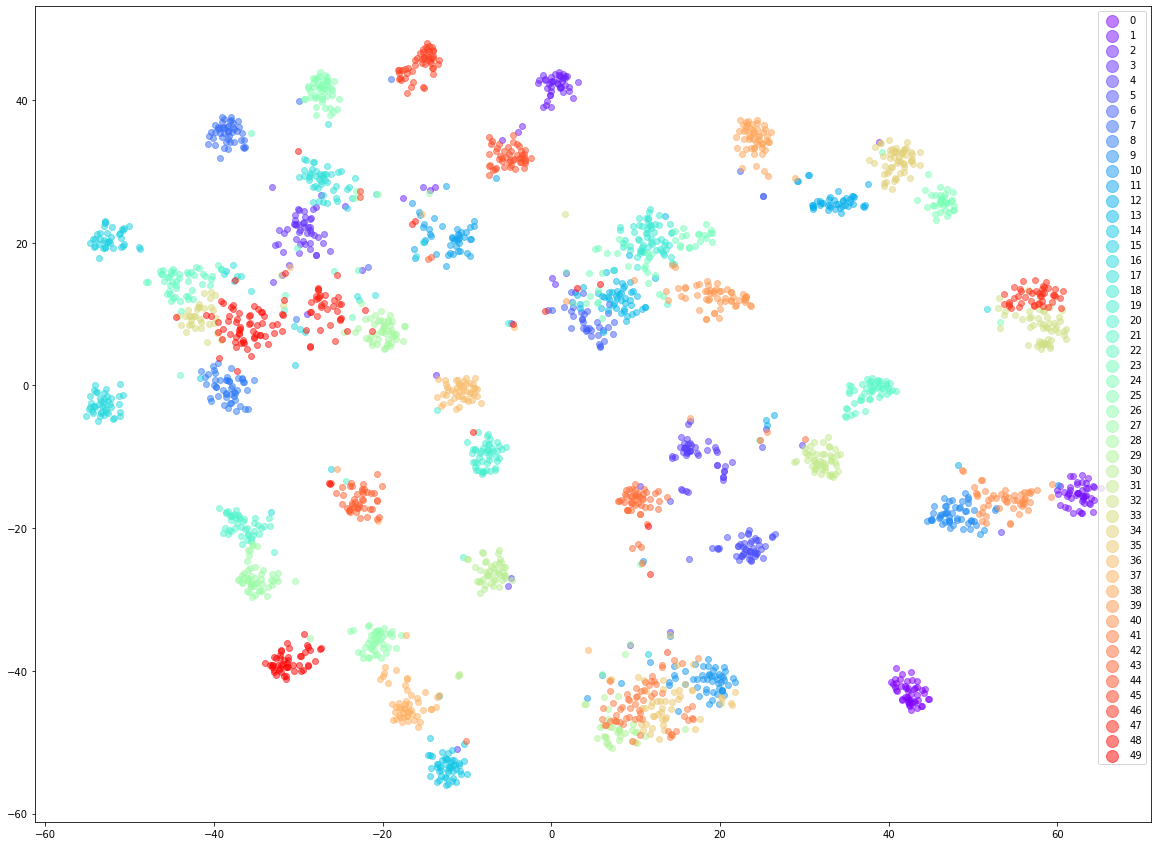

In [20]:
print(FEATS.shape)
df = pd.read_csv('result.csv')
labels = df['label']

tsne = TSNE().fit_transform(FEATS)

tx = tsne[:, 0]
ty = tsne[:, 1]
classes = np.arange(50)

colors = cm.rainbow(np.linspace(0, 1, 50))
fig, ax = plt.subplots(figsize=(20,15))
for lab in range(50):
    indices = labels==lab
    ax.scatter(tsne[indices, 0],tsne[indices, 1], color=colors[lab],label = lab ,alpha=0.5)
ax.legend(loc='best',fontsize='medium', markerscale=2)
plt.show()